In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data.load_data import load_excel_data
from data.clean_data import clean_data

# Ubah path ke file kamu
file_path = '../data/raw/dataset original.xlsx'

# Load data
df = load_excel_data(file_path)

# Bersihkan data
df_cleaned = clean_data(df)

# Tampilkan hasil data yang sudah dibersihkan
df_cleaned.head()


,jumlah
0,1005200
1,723717
2,863592
3,867901
4,864382


In [2]:
# Peta nama bulan ke angka
bulan_mapping = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}

df['bulan_angka'] = df['bulan'].str.lower().map(bulan_mapping)

In [3]:
df

,bulan,tahun,jumlah,bulan_angka
0,january,2006,1005200,1
1,february,2006,723717,2
2,march,2006,863592,3
3,april,2006,867901,4
4,may,2006,864382,5
...,...,...,...,...
211,august,2023,1525937,8
212,september,2023,1468845,9
213,october,2023,1582366,10
214,november,2023,1599568,11


In [4]:
df = df.rename(columns={"tahun": "year", "bulan_angka": "month"})

# Lalu buat kolom tanggal
df["tanggal"] = pd.to_datetime(df[["year", "month"]].assign(day=1))

In [5]:
# Indikator musiman (misalnya Desember-Februari sebagai musim liburan)
df['is_holiday_season'] = df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)

# Lag dan rolling average
df['jumlah_lag_1'] = df['jumlah'].shift(1) # jumlah 
df['jumlah_lag_12'] = df['jumlah'].shift(12)
df['rolling_mean_3'] = df['jumlah'].rolling(window=3).mean()
df['rolling_std_3'] = df['jumlah'].rolling(window=3).std()


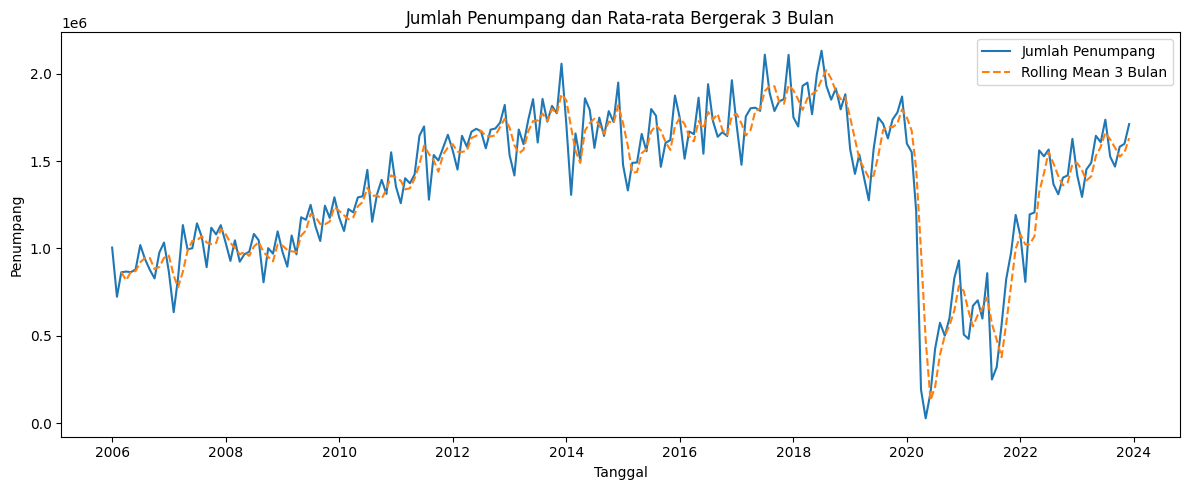

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df['tanggal'], df['jumlah'], label='Jumlah Penumpang')
plt.plot(df['tanggal'], df['rolling_mean_3'], linestyle='--', label='Rolling Mean 3 Bulan')
plt.title('Jumlah Penumpang dan Rata-rata Bergerak 3 Bulan')
plt.xlabel('Tanggal')
plt.ylabel('Penumpang')
plt.legend()
plt.tight_layout()
plt.show()
